## 1. Importi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import csv
import os.path

import mplcyberpunk
plt.style.use("cyberpunk")

## 2. Branje podatkov

In [2]:
with open('../data/kd2018.csv', 'rt') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    head0 = next(reader)
    none_handler = lambda i : i or None
    main_data18 = np.array([none_handler(i) for i in [row for row in reader]])

In [3]:
with open('../data/kd2019.csv', 'rt') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    head1 = next(reader)
    none_handler = lambda i : i or None
    main_data19 = np.array([none_handler(i) for i in [row for row in reader]])

In [4]:
with open('../data/kd2020.csv', 'rt') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    head2 = next(reader)
    none_handler = lambda i : i or None
    main_data20 = np.array([none_handler(i) for i in [row for row in reader]])

In [5]:
with open('../data/kd2021.csv', 'rt') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    head3 = next(reader)
    none_handler = lambda i : i or None
    main_data21 = np.array([none_handler(i) for i in [row for row in reader]])

### 2.1 Priprava podatkov
V podatkih je nek zločin zapisan večrat. To je ocitno, saj se zaporedna številka kaznivega dejanja ponavlja večrat.

In [6]:
found_ids = set()
rows_to_keep = np.array([])
for i in range(len(main_data18)):
    if (main_data18[i][0] not in found_ids):
        rows_to_keep = np.append(rows_to_keep, True)
        found_ids.add(main_data18[i][0])
    else:
        rows_to_keep = np.append(rows_to_keep, False)

main_data18_filtered = main_data18[np.ma.make_mask(rows_to_keep)]

found_ids = set()
rows_to_keep = np.array([])
for i in range(len(main_data19)):
    if (main_data19[i][0] not in found_ids):
        rows_to_keep = np.append(rows_to_keep, True)
        found_ids.add(main_data19[i][0])
    else:
        rows_to_keep = np.append(rows_to_keep, False)

main_data19_filtered = main_data19[np.ma.make_mask(rows_to_keep)]

found_ids = set()
rows_to_keep = np.array([])
for i in range(len(main_data20)):
    if (main_data20[i][0] not in found_ids):
        rows_to_keep = np.append(rows_to_keep, True)
        found_ids.add(main_data20[i][0])
    else:
        rows_to_keep = np.append(rows_to_keep, False)

main_data20_filtered = main_data20[np.ma.make_mask(rows_to_keep)]

found_ids = set()
rows_to_keep = np.array([])
for i in range(len(main_data21)):
    if (main_data21[i][0] not in found_ids):
        rows_to_keep = np.append(rows_to_keep, True)
        found_ids.add(main_data21[i][0])
    else:
        rows_to_keep = np.append(rows_to_keep, False)

main_data21_filtered = main_data21[np.ma.make_mask(rows_to_keep)]

In [7]:
main_data = np.concatenate((main_data18_filtered, main_data19_filtered, main_data20_filtered, main_data21_filtered))

In [8]:
cities, counts = np.unique(main_data[:, 19], return_counts=True)
dict_id_city = dict((id, str.lower(city)) for id, city in enumerate(cities))
dict_city_id = dict((str.lower(city), id) for id, city in enumerate(cities))

## 3. Štetje zločinov v posamezni občini

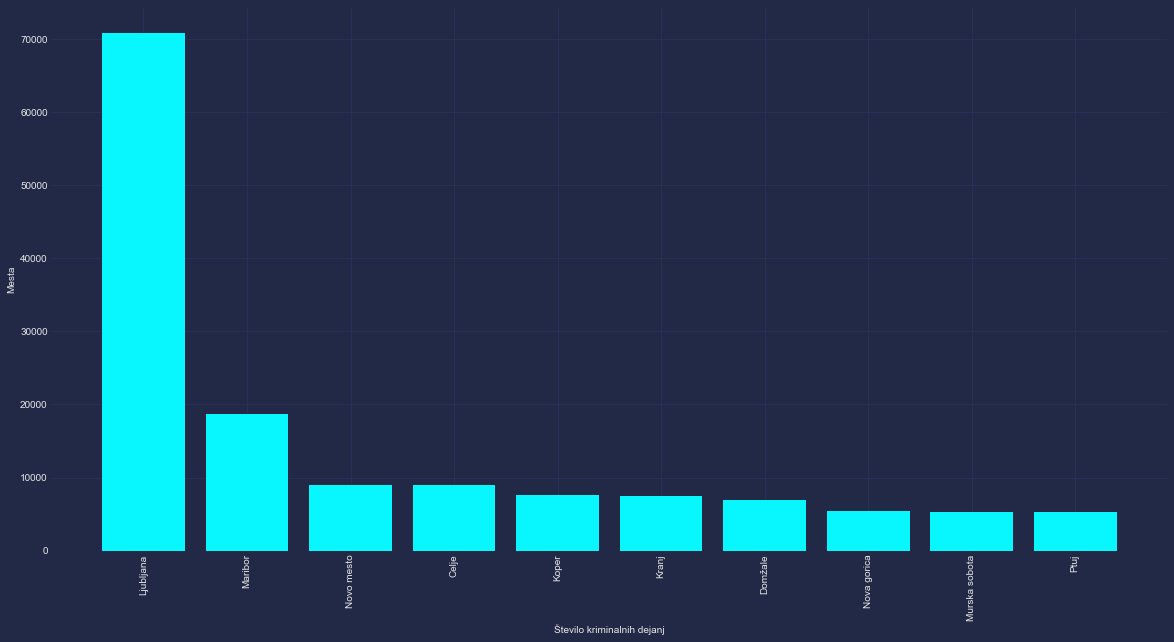

In [9]:
# count number of occurences of each value in column
dict_cityId_crimeCount = dict((dict_city_id[str.lower(cities[i])], counts[i]) for i in range(len(cities)))

y_axis = np.array([str.capitalize(dict_id_city[cityId]) for cityId in dict_cityId_crimeCount.keys()])
x_axis = np.array([dict_cityId_crimeCount[cityId] for cityId in dict_cityId_crimeCount.keys()])

counts_argsort = np.argsort(x_axis)[::-1]

# make graph of number of occurences of each value in column
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.xlabel('Število kriminalnih dejanj')
plt.ylabel('Mesta')
plt.bar(y_axis[counts_argsort][:10], x_axis[counts_argsort][:10])
plt.show()

Že takoj na prvi pogled je razvidno, da se največ zločina zgodi v Ljubljani. Sigurno pa na podlagi teh rezultatov ne moremo odgovoriti na vprašanje, "Katera občina je najbolj varna/nevarna?". Dodal bom podatke za število prebivalcev v vsaki občini.

In [10]:
with open('../data/stevilo_prebivalcev_po_obcinah.csv', 'rt', encoding="windows-1250") as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    head2 = next(reader)
    none_handler = lambda i : i or None
    count_per_city = np.array([none_handler(i) for i in [row for row in reader]])

In [11]:
# if name contains / split by / and keep first part
count_per_city = [(str.split(row[0], '/')[0], row[1]) for row in count_per_city]
dict_cityId_popCount = dict([(dict_city_id[str.lower(count_per_city[i][0])], count_per_city[i][1]) for i in range(len(count_per_city)) if str.lower(count_per_city[i][0]) in dict_city_id.keys()])

# delete unknown values from cities we are watching
to_be_deleted = []
for id in dict_id_city.keys():
    if id not in dict_cityId_popCount.keys():
        to_be_deleted.append(id)

print(f"Izbrisani so bili podatki {[dict_id_city[id] for id in to_be_deleted]}, saj za njih ne poznamo prave občine, ali pa le ne poznamo števila prebivalcev.")

for id in to_be_deleted:
    del dict_city_id[dict_id_city[id]]
    del dict_id_city[id]

Izbrisani so bili podatki ['ajdovščina', 'kočevje', 'neznana obč', 'neznana ue', 'ni podatka', 'tržič', 'črnomelj', 'šentjur pri celju'], saj za njih ne poznamo prave občine, ali pa le ne poznamo števila prebivalcev.


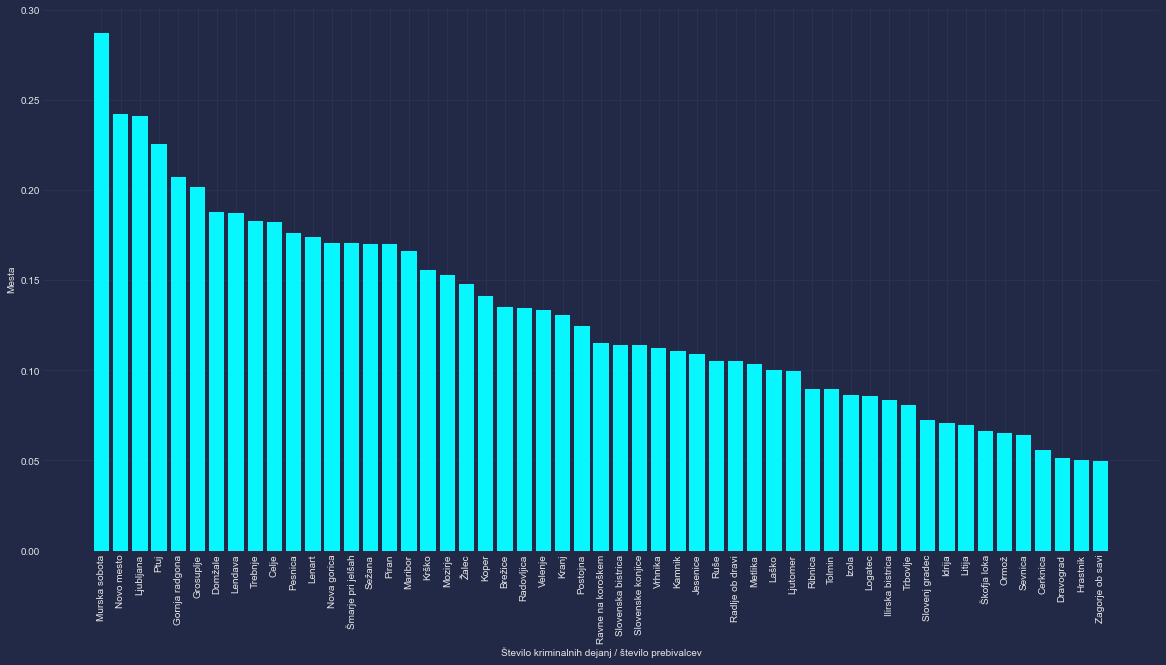

In [13]:
# normalized data of crimes per city by population of city
crime_per_city_norm0 = np.array([tuple([cityId, float(dict_cityId_crimeCount[cityId]) / float(dict_cityId_popCount[cityId])]) for cityId in dict_id_city.keys()])

cityId, x_axis = zip(*crime_per_city_norm0)

x_axis_argsort = np.argsort(x_axis)[::-1]
x_axis = np.array(x_axis)
y_axis = np.array([str.capitalize(dict_id_city[id]) for id in cityId])


plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.xlabel('Število kriminalnih dejanj / število prebivalcev')
plt.ylabel('Mesta')
plt.bar(y_axis[x_axis_argsort], x_axis[x_axis_argsort])
plt.show()

Murska sobota vrne največjo vrednost normaliziranega števila kriminala s številom prebivalcev. Zakaj?
Vse primere zločina v Murski Soboti bom zapisal v datoteko.

In [14]:
ms_crime = np.array([i for i in main_data if str.lower(i[19]) == 'murska sobota'])

if (not os.path.exists('../data/kd18192021_murska_sobota.csv')):
    open('../data/kd18192021_murska_sobota.csv', 'x')

with open('../data/kd18192021_murska_sobota.csv', 'w', encoding="windows-1250", newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=';')
    writer.writerow(head1)
    writer.writerows(ms_crime)

In [15]:
with open('../data/kd18192021_murska_sobota.csv', 'rt', encoding="windows-1250") as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    head0 = next(reader)
    none_handler = lambda i : i or None
    main_data_murska_sobota = np.array([none_handler(i) for i in [row for row in reader]])

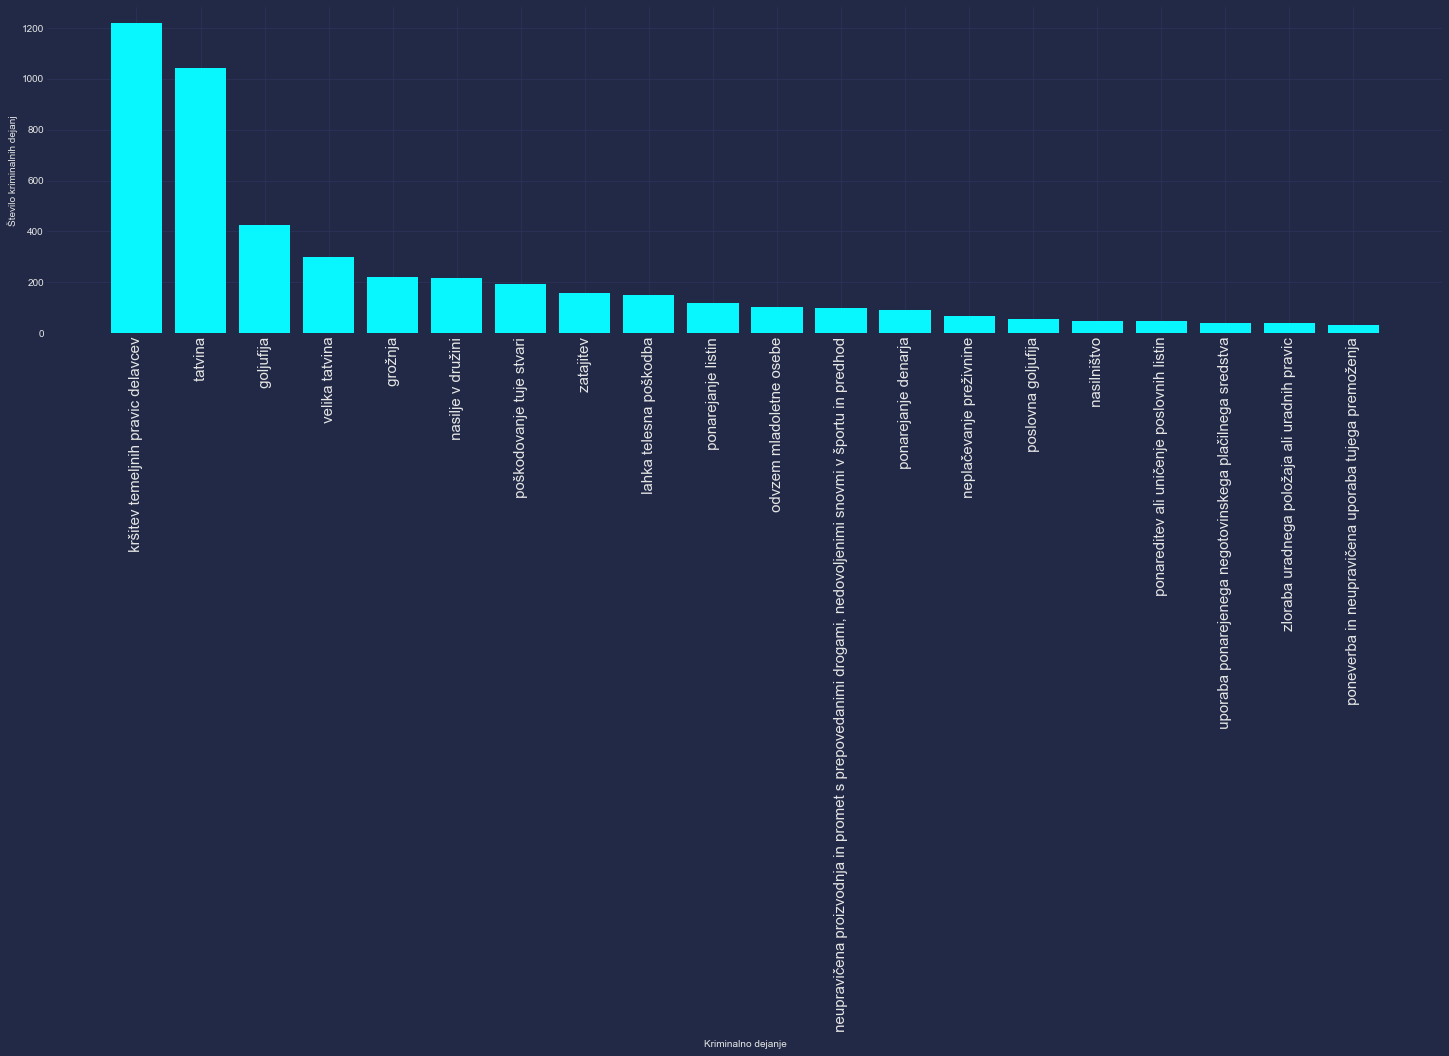

In [17]:
zlocini_gr = np.array([str.split(i, '-')[-1] for i in main_data_murska_sobota[:, 6]])

zlocin, count = np.unique([zlocin for zlocin in zlocini_gr], return_counts=True)
dict_zlocini_count_gr = dict(zip(zlocin, count))

x_axis = np.array([dict_zlocini_count_gr[zlocin] for zlocin in zlocin])
y_axis = np.array([str.capitalize(zlocin) for zlocin in zlocin])

x_axis_argsort = np.argsort(x_axis)[::-1]

y_axis = y_axis[x_axis_argsort]
x_axis = x_axis[x_axis_argsort]

#plot graph
plt.figure(figsize=(25, 6))
plt.xticks(rotation=90, fontsize=15)
plt.xlabel('Kriminalno dejanje')
plt.ylabel('Število kriminalnih dejanj')
plt.bar(y_axis[:20], x_axis[:20])
plt.show()


Kršitev temeljnih pravic delavcev je največ. Izpišem jih:

In [ ]:
j = 0
for i in main_data_murska_sobota:
    if (str.strip(str.upper(i[6].split('-')[-1])) == 'KRŠITEV TEMELJNIH PRAVIC DELAVCEV'):
        j += 1

print(f"Število kršitev temeljnih pravic delavcev v gornji radgoni je {j}.")

In [ ]:
j = 0
for i in main_data:
    if (str.strip(str.upper(i[6].split('-')[-1])) == 'KRŠITEV TEMELJNIH PRAVIC DELAVCEV'):
        j += 1

print(f"Število kršitev temeljnih pravic delavcev je {j/len(main_data)}.")

Kar precejšnji delež kršitev je 'KRŠITEV TEMELJNIH PRAVIC DELAVCEV', kateri za nas niso zelo pomembni. Zato bom za vizualizacijo te odstranil.

Očitno je največ vnosov vedno kršitev delavskih pravic, kar za naš problem ni tako zanimivo, zato za grafični pogled to vrednost spustimo.

In [ ]:
mask = np.ma.make_mask(np.array([str.strip(str.upper(i[6].split('-')[-1])) != 'KRŠITEV TEMELJNIH PRAVIC DELAVCEV' for i in main_data]))

cities, counts = np.unique(main_data[mask, 19], return_counts=True)

# count number of occurences of each value in column
dict_cityId_crimeCount_noKDelavcev = dict((dict_city_id[str.lower(cities[i])], counts[i]) for i in range(len(cities)) if str.lower(cities[i]) in dict_city_id.keys())

y_axis = np.array([str.capitalize(dict_id_city[cityId]) for cityId in dict_cityId_crimeCount_noKDelavcev.keys()])
x_axis = np.array([dict_cityId_crimeCount_noKDelavcev[cityId] for cityId in dict_cityId_crimeCount_noKDelavcev.keys()])

counts_argsort = np.argsort(x_axis)[::-1]

# make graph of number of occurences of each value in column
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.bar(y_axis[counts_argsort], x_axis[counts_argsort])
plt.show()

Sedaj ponovno normaliziram.

In [ ]:
# normalized data of crimes per city by population of city
crime_per_city_norm0_noKDelavcev = np.array([tuple([cityId, float(dict_cityId_crimeCount_noKDelavcev[cityId]) / float(dict_cityId_popCount[cityId])]) for cityId in dict_id_city.keys()])

cityId, x_axis = zip(*crime_per_city_norm0_noKDelavcev)

x_axis_argsort = np.argsort(x_axis)[::-1]
x_axis = np.array(x_axis)
y_axis = np.array([str.capitalize(dict_id_city[id]) for id in cityId])


plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.xlabel("Število kriminalnih dejanj / število prebivalcev")
plt.ylabel("Mesta")
plt.bar(y_axis[x_axis_argsort], x_axis[x_axis_argsort])
plt.show()

Sedaj imajo izbire za najbolj nevarna mesta vel smisla in so bližje pričakovanim vrednostim.